In [164]:
#first import libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont, ImageEnhance
import os

#tensorflow
import tensorflow as tf
#from tensorflow.python.keras.utils.vis_utils import plot_model

#import time
import time

In [165]:
background_images = 'images/waldo_background.jpg'
waldo = 'images/waldo.png'
wilma = 'images/wilma.png'

In [166]:
import random 

In [167]:
image_waldo = Image.open(waldo) 
image_wilma = Image.open(wilma) 
background = Image.open(background_images)

In [168]:
background.size 

(3000, 1926)

1. create sections of waldo 

In [169]:
# store all diff sections in this array 
waldo_sections = [] 

In [170]:
image_waldo.size

(812, 1600)

In [171]:
new_size = (101, 200) # Set the new size (width, height) in pixels
image_waldo = image_waldo.resize(new_size)

In [172]:
image_waldo.size 

(101, 200)

In [173]:
# Get the dimensions of the image
width, height = image_waldo.size

# need to redefine section height and width randomly every time 
section_width = random.randint(40, 101) 
section_height = random.randint(100, 200) # randomly choosing a section of waldo from 400 (just face) to 1600 (full body)

# Loop through 1000 times
for i in range(1000):
    # Generate random x and y coordinates for the top-left corner of the section
    x = random.randint(0, width - section_width)
    y = 0 # always starting at the top of waldo 

    # need to redefine section height and width randomly every time 
    section_width = random.randint(40, 101) 
    section_height = random.randint(100, 200) # randomly choosing a section of waldo from 400 (just face) to 1600 (full body)

    # Crop the image to the section
    section = image_waldo.crop((x, y, x + section_width, y + section_height))

    # Do something with the section, for example save it to a file
    # section.save(f"section_{i}.png")
    waldo_sections.append(section) 

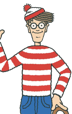

In [174]:
waldo_sections[1] 

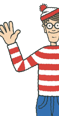

In [175]:
waldo_sections[2] 

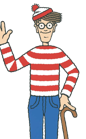

In [176]:
waldo_sections[99] 

2. we can do the same for wilma now too 

In [177]:
wilma_sections = [] 

In [178]:
image_wilma.size

(469, 1000)

In [179]:
new_size = (70, 150) # Set the new size (width, height) in pixels
image_wilma = image_wilma.resize(new_size)

In [180]:
# Get the dimensions of the image
width, height = image_wilma.size

section_width = random.randint(25, 70) 
section_height = random.randint(80, 150) # randomly choosing a section of wilma 

# Loop through 1000 times
for i in range(1000):
    # Generate random x and y coordinates for the top-left corner of the section
    x = random.randint(0, width - section_width)
    y = 0 # always starting at the top of wilma 

    # need to redefine section height and width randomly every time 
    section_width = random.randint(25, 70) 
    section_height = random.randint(80, 150) # randomly choosing a section of wilma 

    # Crop the image to the section
    section = image_wilma.crop((x, y, x + section_width, y + section_height))

    # Do something with the section, for example save it to a file
    wilma_sections.append(section) 

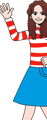

In [181]:
wilma_sections[1]

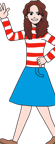

In [182]:
wilma_sections[5]

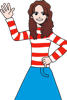

In [183]:
wilma_sections[99]

3. now place these on background image

In [184]:
base_image = background 
for i in range(100): 
    overlay_image = waldo_sections[i]
    # Get the dimensions of the base image
    base_width, base_height = base_image.size

    # Get the dimensions of the overlay image
    overlay_width, overlay_height = overlay_image.size
    for j in range(10): 
        # Generate random x and y coordinates for the top-left corner of the overlay image
        x = random.randint(0, base_width - overlay_width)
        y = random.randint(0, base_height - overlay_height)

        # Create a new image with the same dimensions as the base image
        new_image = Image.new("RGBA", (base_width, base_height), (0, 0, 0, 0))

        # Paste the base image onto the new image
        new_image.paste(base_image, (0, 0))

        # Paste the overlay image onto the new image at the random coordinates
        new_image.paste(overlay_image, (x, y), overlay_image)

        # Save the new image to a file
        new_image.save(f"images/generated_test_data/waldo_image_{i}_{j}_{x}_{y}.png") # in each image we save coordinates as last two digits 

In [ ]:
base_image = background 
for i in range(100): 
    overlay_image = wilma_sections[i]
    # Get the dimensions of the base image
    base_width, base_height = base_image.size

    # Get the dimensions of the overlay image
    overlay_width, overlay_height = overlay_image.size
    for j in range(10): 
        # Generate random x and y coordinates for the top-left corner of the overlay image
        x = random.randint(0, base_width - overlay_width)
        y = random.randint(0, base_height - overlay_height)

        # Create a new image with the same dimensions as the base image
        new_image = Image.new("RGBA", (base_width, base_height), (0, 0, 0, 0))

        # Paste the base image onto the new image
        new_image.paste(base_image, (0, 0))

        # Paste the overlay image onto the new image at the random coordinates
        new_image.paste(overlay_image, (x, y), overlay_image)

        # Save the new image to a file
        new_image.save(f"images/generated_test_data/wilma_image_{i}_{j}.png") # in each image we save coordinates as last two digits 